In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_10_instances_with_fingers.csv')

df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))


['aprender_18' 'aprender_27' 'aprender_35' 'aprender_7' 'bien_174'
 'bien_269' 'comer_146' 'comer_164' 'comer_484' 'comer_489' 'comer_743'
 'comer_779' 'comer_86' 'cómo_12' 'cómo_387' 'cómo_90' 'decir_101'
 'decir_276' 'decir_528' 'decir_789' 'dentro_369' 'dentro_457'
 'dentro_692' 'dentro_73' 'ese_100' 'ese_385' 'ese_608' 'ese_638'
 'ese_642' 'ese_697' 'fuerte_153' 'pensar_339' 'pensar_66' 'pensar_761'
 'pensar_771' 'tú_277' 'tú_639' 'tú_778']


In [79]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27',
 'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466',
 'bien_147','bien_174','bien_230','bien_241','bien_244','bien_269',
 'bien_278','bien_329','bien_337','bien_416','comer_146','comer_164',
 'comer_313','comer_477','comer_484','comer_489','comer_705','comer_743',
 'comer_779','comer_86','cuánto_405','cuánto_420','cuánto_445',
 'cuánto_448','cuánto_456','cuánto_483','cuánto_706','cuánto_708',
 'cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_223','cómo_230',
 'cómo_387','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','decir_101',
 'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433',
 'decir_528','decir_755','decir_789','dentro_369','dentro_457',
 'dentro_486','dentro_55','dentro_566','dentro_596','dentro_603',
 'dentro_627','dentro_692','dentro_73','emoción_143','emoción_145',
 'emoción_249','emoción_272','emoción_281','emoción_43','emoción_45',
 'emoción_54','emoción_71','emoción_81','ese_100','ese_143','ese_214',
 'ese_385','ese_544','ese_608','ese_638','ese_642','ese_697','ese_719',
 'fuerte_152','fuerte_153','fuerte_240','fuerte_314','fuerte_361',
 'fuerte_362','fuerte_363','fuerte_571','fuerte_584','fuerte_588',
 'pensar_213','pensar_339','pensar_378','pensar_61','pensar_613',
 'pensar_623','pensar_66','pensar_761','pensar_771','pensar_97',
 'sentir_14','sentir_149','sentir_16','sentir_187','sentir_38',
 'sentir_458','sentir_570','sentir_591','sentir_604','sentir_89','sí_200',
 'sí_228','sí_240','sí_251','sí_277','sí_315','sí_37','sí_657','sí_659',
 'sí_76','tú_154','tú_176','tú_263','tú_277','tú_53','tú_635','tú_639',
 'tú_711','tú_778','tú_96','yo_113','yo_121','yo_123','yo_125','yo_152',
 'yo_164','yo_193','yo_235','yo_237','yo_3'],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst
temp_10_10inst.instance.unique()

temp_10_10inst

temp_10_10inst_w1 = temp_10_10inst[~temp_10_10inst.classes.str.startswith('bien')]
temp_10_10inst_w2 = temp_10_10inst_w1[~temp_10_10inst_w1.classes.str.startswith('cómo')]
temp_10_10inst_w3 = temp_10_10inst_w2[~temp_10_10inst_w2.classes.str.startswith('dentro')]
temp_10_10inst_w4 = temp_10_10inst_w3[~temp_10_10inst_w3.classes.str.startswith('ese')]
temp_10_10inst_w5 = temp_10_10inst_w4[~temp_10_10inst_w4.classes.str.startswith('fuerte')]
temp_10_10inst_w6 = temp_10_10inst_w5[~temp_10_10inst_w5.classes.str.startswith('tú')]

In [80]:
# Number of instances
temp_10_10inst_w6['instance'].nunique()


50

In [81]:
# Number of classes
temp_10_10inst_w6['classes'].nunique()

5

In [82]:
dataset_10_10inst_verbs =temp_10_10inst_w6.iloc[:,1:1503]

In [83]:
print(pd.unique(dataset_10_10inst_verbs['classes']))

X_10_10inst_verbs= dataset_10_10inst_verbs.iloc[:,:-1].values
y_10_10inst_verbs=  dataset_10_10inst_verbs.iloc[:,-1].values


Labelencoder_Y = LabelEncoder()
y_10_10inst_verbs= Labelencoder_Y.fit_transform(y_10_10inst_verbs)
y_10_10inst_verbs

X_train_10_10inst_verbs, X_test_10_10inst_verbs, y_train_10_10inst_verbs, y_test_10_10inst_verbs = train_test_split(X_10_10inst_verbs, y_10_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_10_10inst_verbs = scaler.fit_transform(X_train_10_10inst_verbs)
X_test_10_10inst_verbs = scaler.transform(X_test_10_10inst_verbs)

['aprender' 'comer' 'decir' 'pensar' 'sentir']


([<matplotlib.axis.XTick at 0x20e79654648>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

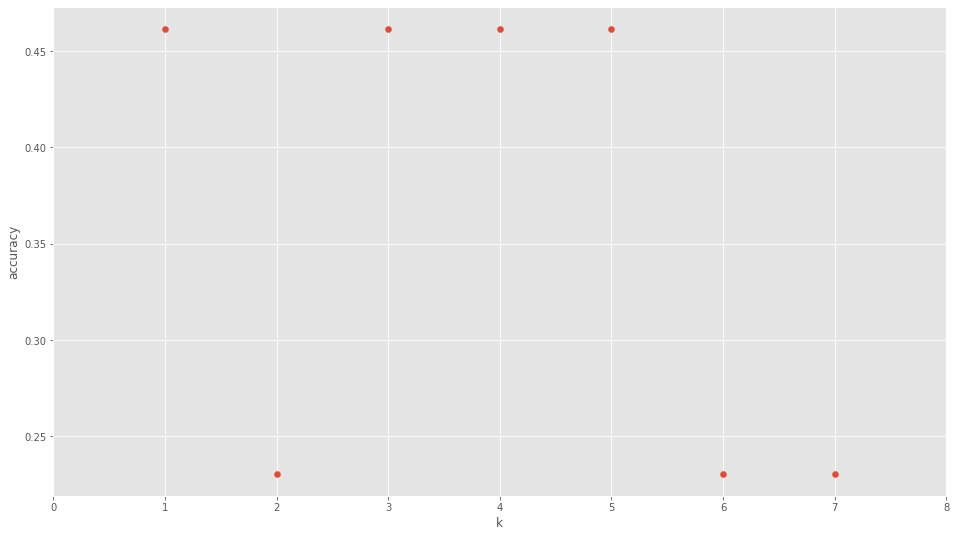

In [84]:
k_range_10_10inst_verbs = range(1, 8)
scores_10_10inst_verbs = []
for k in k_range_10_10inst_verbs:
    knn_10_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_10_10inst_verbs.fit(X_train_10_10inst_verbs, y_train_10_10inst_verbs)
    scores_10_10inst_verbs.append(knn_10_10inst_verbs.score(X_test_10_10inst_verbs, y_test_10_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_10_10inst_verbs, scores_10_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.46


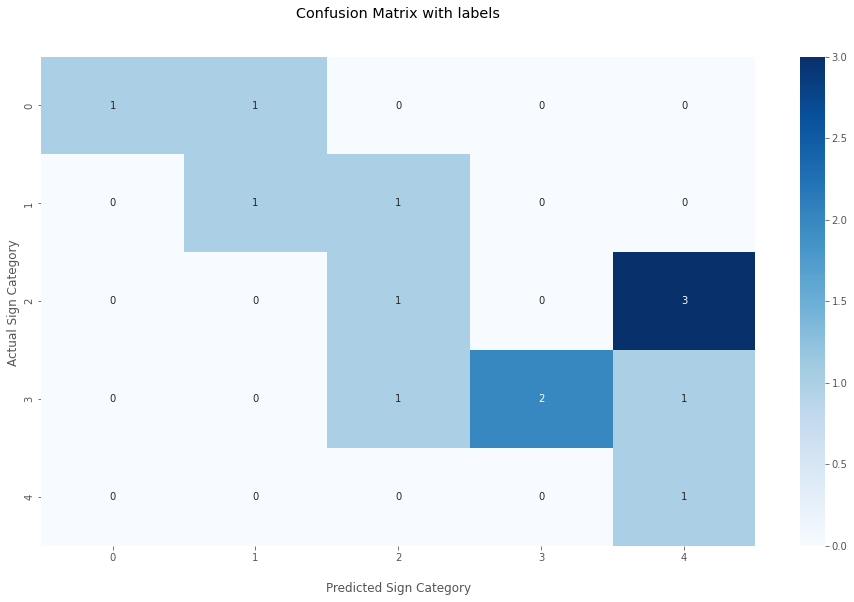

In [85]:
n_neighbors_10_10inst_verbs = 1
 
knn_10_10inst_verbs = KNeighborsClassifier(n_neighbors_10_10inst_verbs)
knn_10_10inst_verbs.fit(X_train_10_10inst_verbs, y_train_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_train_10_10inst_verbs, y_train_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_test_10_10inst_verbs, y_test_10_10inst_verbs)))

pred_10_10inst_verbs = knn_10_10inst_verbs.predict(X_test_10_10inst_verbs)
cf_matrix_10_10inst_verbs = confusion_matrix(y_test_10_10inst_verbs, pred_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_verbs = sns.heatmap(cf_matrix_10_10inst_verbs, annot=True, cmap='Blues')

ax_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

#temp1 = ax_10_10inst_verbs.xaxis.set_ticklabels(['aprender' ,'comer', 'pensar', 'sentir'])
#temp2 = ax_10_10inst_verbs.yaxis.set_ticklabels(['aprender', 'comer', 'pensar' ,'sentir'])

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.23


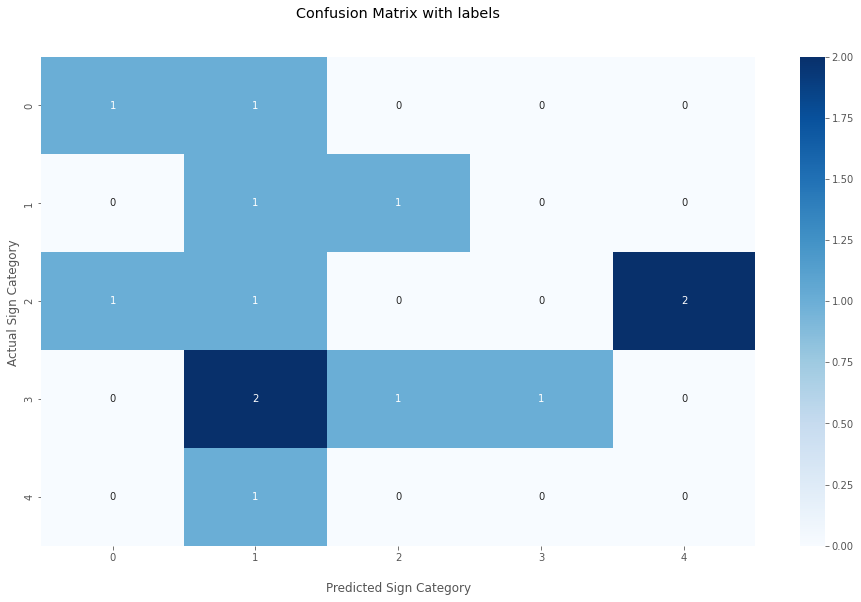

In [86]:
n_neighbors_10_10inst_verbs = 2
 
knn_10_10inst_verbs = KNeighborsClassifier(n_neighbors_10_10inst_verbs)
knn_10_10inst_verbs.fit(X_train_10_10inst_verbs, y_train_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_train_10_10inst_verbs, y_train_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_test_10_10inst_verbs, y_test_10_10inst_verbs)))

pred_10_10inst_verbs = knn_10_10inst_verbs.predict(X_test_10_10inst_verbs)
cf_matrix_10_10inst_verbs = confusion_matrix(y_test_10_10inst_verbs, pred_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_verbs = sns.heatmap(cf_matrix_10_10inst_verbs, annot=True, cmap='Blues')

ax_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

#temp1 = ax_10_10inst_verbs.xaxis.set_ticklabels(['aprender' ,'comer', 'pensar', 'sentir'])
#temp2 = ax_10_10inst_verbs.yaxis.set_ticklabels(['aprender', 'comer', 'pensar' ,'sentir'])

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.62
Accuracy of K-NN classifier on test set: 0.46


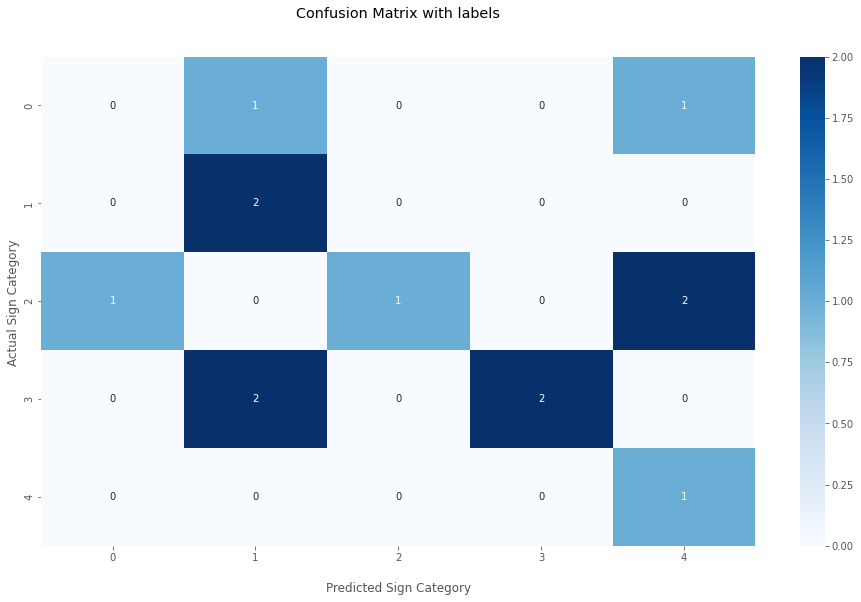

In [87]:
n_neighbors_10_10inst_verbs = 3
 
knn_10_10inst_verbs = KNeighborsClassifier(n_neighbors_10_10inst_verbs)
knn_10_10inst_verbs.fit(X_train_10_10inst_verbs, y_train_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_train_10_10inst_verbs, y_train_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_test_10_10inst_verbs, y_test_10_10inst_verbs)))

pred_10_10inst_verbs = knn_10_10inst_verbs.predict(X_test_10_10inst_verbs)
cf_matrix_10_10inst_verbs = confusion_matrix(y_test_10_10inst_verbs, pred_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_verbs = sns.heatmap(cf_matrix_10_10inst_verbs, annot=True, cmap='Blues')

ax_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

#temp1 = ax_10_10inst_verbs.xaxis.set_ticklabels(['aprender' ,'comer', 'pensar', 'sentir'])
#temp2 = ax_10_10inst_verbs.yaxis.set_ticklabels(['aprender', 'comer', 'pensar' ,'sentir'])

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.57
Accuracy of K-NN classifier on test set: 0.46


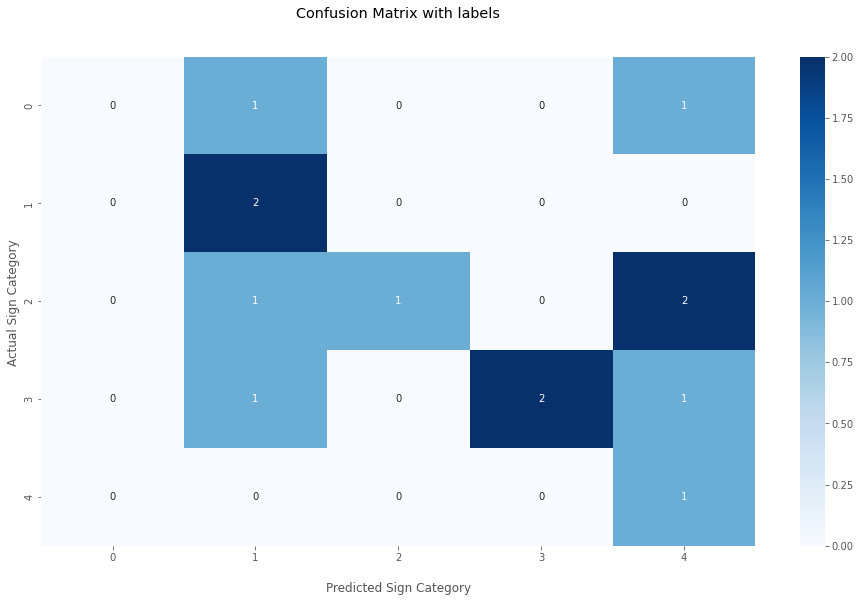

In [88]:
n_neighbors_10_10inst_verbs = 5
 
knn_10_10inst_verbs = KNeighborsClassifier(n_neighbors_10_10inst_verbs)
knn_10_10inst_verbs.fit(X_train_10_10inst_verbs, y_train_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_train_10_10inst_verbs, y_train_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_test_10_10inst_verbs, y_test_10_10inst_verbs)))

pred_10_10inst_verbs = knn_10_10inst_verbs.predict(X_test_10_10inst_verbs)
cf_matrix_10_10inst_verbs = confusion_matrix(y_test_10_10inst_verbs, pred_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_verbs = sns.heatmap(cf_matrix_10_10inst_verbs, annot=True, cmap='Blues')

ax_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

#temp1 = ax_10_10inst_verbs.xaxis.set_ticklabels(['aprender' ,'comer', 'pensar', 'sentir'])
#temp2 = ax_10_10inst_verbs.yaxis.set_ticklabels(['aprender', 'comer', 'pensar' ,'sentir'])

## Display the visualization of the Confusion Matrix.
plt.show()